In [3]:
import torch 
import torch.nn as nn

import numpy as np 
from sklearn import datasets
import matplotlib.pyplot as plt

Crutial steps when building my model:
1. Design my model (input, output, forward pass)
2. Construct loss and optimizer
3. Training loop
    - forward pass: compute prediction
    - backward pass: gradients
    - update weights

Training data X= tensor([[-0.6118],
        [-0.2494],
        [ 0.4885],
        [ 0.7620],
        [ 1.5198]])
torch.Size([100, 1])

Labels y= tensor([[-55.5386],
        [-10.6620],
        [ 22.7574],
        [101.0961],
        [144.3376]])
torch.Size([100, 1])


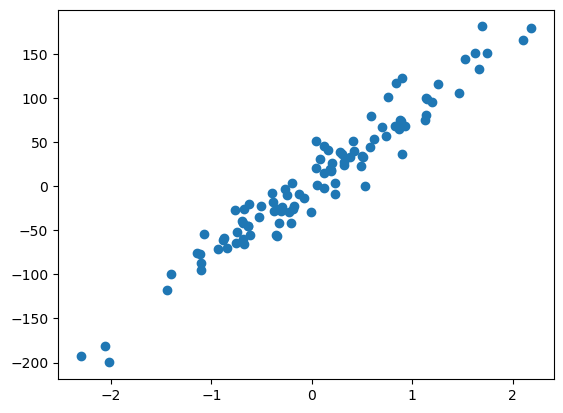

In [16]:
### 0- Prepare data ### 

X_numpy, y_numpy = datasets.make_regression(n_samples=100,
                                            n_features=1,
                                            noise=20,
                                            random_state=1)

# transform to torch tensors 
X = torch.from_numpy(X_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32))

# reshape data 
y = y.view(y.shape[0],1)

n_samples, n_features = X.shape

print('Training data X=',X[:5])
print(X.shape)
print('')
print('Labels y=',y[:5])
print(y.shape)

plt.scatter(X,y)

In [17]:
#### 1- Design Model (input, output size, forward pass) ####

input_size = n_features 
ouput_size = y.shape[1]

model = nn.Linear(input_size, ouput_size)

In [18]:
### 2- Construct Loss and Optimizer ### 

criterion = nn.MSELoss()

learning_rate = 0.01

optimizer = torch.optim.SGD(model.parameters(),
                            lr = learning_rate)

In [19]:
### 3- Training loop ###

max_epochs = 100 

for epoch in range(max_epochs):

    # forward pass and loss 
    y_pred = model(X)
    
    loss = criterion(y,y_pred)

    # backward pass
    loss.backward()

    # update weights
    optimizer.step()

    # reset gradients (so that they don't add up)
    optimizer.zero_grad()

    if (epoch+1)%10 == 0:
        print(f'Epoch {epoch+1}\{max_epochs} ; Loss={loss:.4f}')



Epoch 10\100 ; Loss=4462.4541
Epoch 20\100 ; Loss=3326.1001
Epoch 30\100 ; Loss=2504.4468
Epoch 40\100 ; Loss=1909.6770
Epoch 50\100 ; Loss=1478.6960
Epoch 60\100 ; Loss=1166.1001
Epoch 70\100 ; Loss=939.1696
Epoch 80\100 ; Loss=774.2938
Epoch 90\100 ; Loss=654.4135
Epoch 100\100 ; Loss=567.1894


### Plotting results

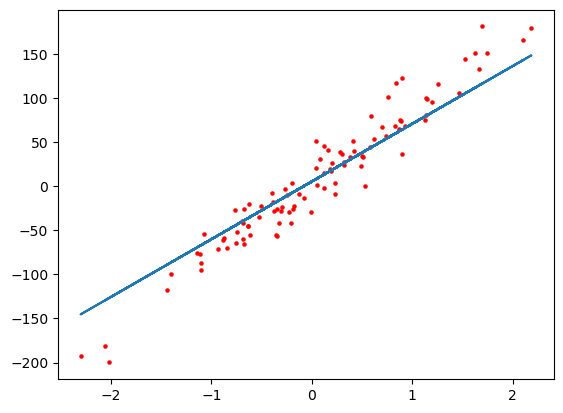

In [28]:
# detach operation from computation graph 
predicted = model(X).detach().numpy()

plt.plot(X,predicted)
plt.scatter(X, y, c='r', s=5)